<a href="https://colab.research.google.com/github/sarodeshreyash/Retail-Sales-Prediction/blob/main/Team_colab_Rossmann_Sales_Prediction_Capstone_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

##### **Project Type**    - Regression
##### **Contribution**    - Team Project
##### **Team Member 1 -**  - Shreyash Sarode
##### **Team Member 2 -**  - Tushar Khairnar
##### **Team Member 3 -**  - Pradnya pagar
##### **Team Member 4 -**  - Taha Nakedar

# **Project Summary -**

#**What is sales forecasting?**
###A sales forecast is an estimation of future sales. This estimation can be based on past values, economic indicators, seasonality, weather forecasts, promo, Assortment of product etc. Lets explore the dataset and coin out the features those will help our Model to predict the Sales of Rossmann stores with best Accuracy.

###To begin we will first need to explore our dataset. Let's import our csv files and convert into dataframes. Here we have two datasets Rossmann Stores Data and stores which consist of information of stores and stores related aspects.





### **Rossmann Sales Dataset -** This dataset is a live dataset of Rossmann Stores. On analysing this problem we observe that rossmann problem is a regression problem and our primarily goal is to predict the sales figures of Rossmann problem. In this Notebook we work on following topics Analysing the dataset by using Exploratory Data Analysis using exponential moving averages analyse trends and seasonality in Rossmann dataset Analyse Regression using following prediction analysis. 
### 1) Linear Regression Analysis
### 2) Lasso Regression Analysis
### 3) Ridge Regression Analysis
### 4) Elastic Net Regression Analysis
### 5) Dession tree Regression Analysis
### 6) Random Forest Regression Analysis
### 7) Gradient Boosting Regression Analysis
### 8) XGboosting Regression Analysis

# **GitHub Link -**

## Shreyash Sarode - https://github.com/sarodeshreyash/Retail-Sales-Prediction
## Tushar Khairnar - https://github.com/tushar2411/Capstone-Project-2.git
## Pradnya Pagar - https://github.com/PradnyaPagar01/Sales-Prediction-Rossmann-stores-sales
## Taha Nakedar - https://github.com/Tahan402/Retail-Sales-Prediction-Capstone

# **Problem Statement**


### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores





### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# ***1. Know Your Data***

### **Important Libraries**





Initially we will importing the important libraries as per our requirement.
there are some libraries we are going to import.

1.   NumPy
2.   Pandas
3.   Matplotlib
4.   Seaborn
5.   Scikit Learn




In [4]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn import model_selection
import missingno as msno

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

**-To begin we will first need to explore our dataset.
Let's import our csv files and convert into dataframes.
Here we have two datasets Rossmann Stores Data and stores which consist of information of stores and stores related aspects.**

In [5]:
#Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**-After mounting the google drive we are ready to load our dataset. We have two dataset.which is Rossmann Store data and Store data.In which we have diffrent store observations and its some information like sales store catagories etc.**


In [6]:
#loading our Two Datasets
rossmann_df = ('/content/drive/MyDrive/Almabetter/Capstone 2 ML Regression/Copy of Rossmann Stores Data.csv')
store_df = ('/content/drive/MyDrive/Almabetter/Capstone 2 ML Regression/Copy of store.csv')

In [7]:
import warnings
warnings.filterwarnings("ignore")

#Creating Dataframes from csv files
Rossmann_Stores_df=pd.read_csv(rossmann_df)
Store_df=pd.read_csv(store_df)

In [8]:
#To display total number of rows and columns
Rossmann_Stores_df.shape

(1017209, 9)

**-In this dataset we can see rows are 1017209 and columns are 9.In all it is very huge data.**

In [9]:
#to display total number of rows and columns
Store_df.shape

(1115, 10)

**-In this dataset there are 1115 rows and 10 columns.As compared to previous dataset this is not that large amount of data.**




In [10]:
#To display first n number of rows 
Rossmann_Stores_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [11]:
Store_df.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [12]:
#To display last n number of rows 
Rossmann_Stores_df.tail(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017199,1106,2,2013-01-01,0,0,0,0,a,1
1017200,1107,2,2013-01-01,0,0,0,0,a,1
1017201,1108,2,2013-01-01,0,0,0,0,a,1
1017202,1109,2,2013-01-01,0,0,0,0,a,1
1017203,1110,2,2013-01-01,0,0,0,0,a,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [13]:
#To display last n number of rows 
Store_df.tail(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1105,1106,a,c,5330.0,9.0,2011.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1106,1107,a,a,1400.0,6.0,2012.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1108,1109,c,a,3490.0,4.0,2011.0,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [14]:
#To overview statistics approach of numerical variables
Rossmann_Stores_df.describe()


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [15]:
#To get the stastical analysis of our datasets
Store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


**-The describe() method returns description of the data in the DataFrame. So that we see DataFrame contains numerical data, the description contains these information for each column in both datasets.**

In [16]:
# Check Unique Values for each variable.
Rossmann_Stores_df.nunique()

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64

In [17]:
# Check Unique Values for each variable.
Store_df.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

In [18]:
#To display names of column ,thier datatypes and missing values
Rossmann_Stores_df.info()
Store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assort

**-As we can see there are no any null values in Rossman Dataset but on the other hand there are multiple null values in store dataset. We have to dealed with them for better EDA and prediction.**

###**Understanding Your Variables**

In [19]:
# fetching list of Columns
Columns = list(Rossmann_Stores_df.describe(include='all').columns)
Columns

['Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday']

In [20]:
# fetching list of Columns
Columns1 = list(Store_df.describe(include='all').columns)
Columns

['Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday']

#***2. Handling Missing Values***

**-Let's begin with our Data Cleaning Process.**

**-There might be some missing values in store dataset in the columns CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear and PromoInterval because total number of rows are 1115. Wheareas these columns don't have 1115 enteries.Let's perform some operations to make sure that there should not be any missing values.Handling missing values is very important because all machine learning models does not work with missing data and that will simply lead to error.**

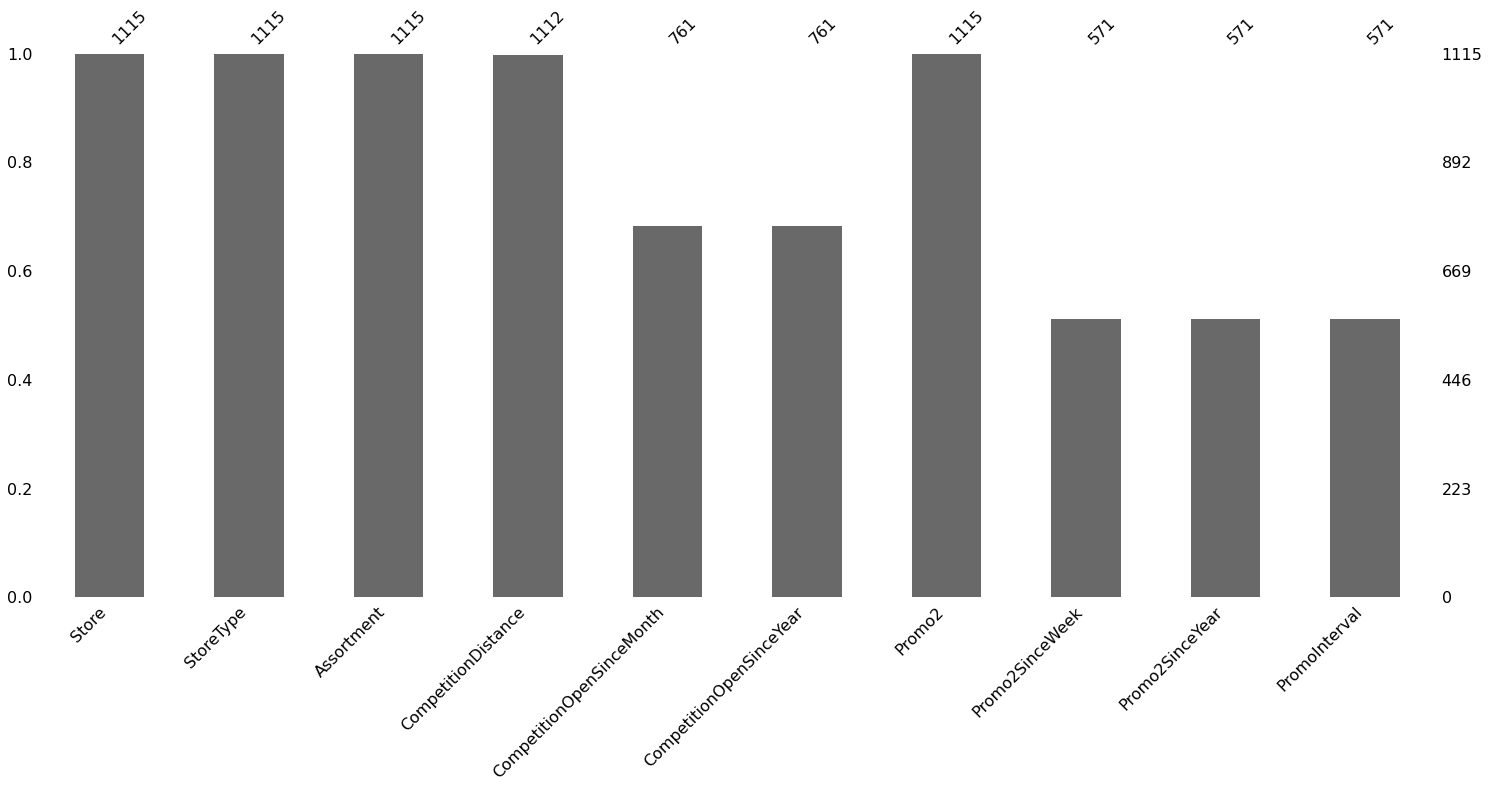

In [21]:
# Visualizing the missing values
msno.bar(Store_df)

In [22]:
#To check null values
Store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [23]:
#Handling missing values
Store_df['CompetitionDistance'] = Store_df['CompetitionDistance'].fillna(Store_df['CompetitionDistance'].median())
Store_df['CompetitionOpenSinceMonth'] = Store_df['CompetitionOpenSinceMonth'].fillna(Store_df['CompetitionOpenSinceMonth'].mode()[0])
Store_df['CompetitionOpenSinceYear'] = Store_df['CompetitionOpenSinceYear'].fillna(Store_df['CompetitionOpenSinceYear'].mode()[0])
Store_df.drop(['Promo2SinceWeek','Promo2SinceYear','PromoInterval'],axis=1,inplace=True)

**-Here we handled missing data with simply filling them with their respective mode,mean and 0 values according to their type of data.**

In [24]:
#To check null values
Store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
dtype: int64

**-Hence we successfully dealed with null values and now we are ready for further process**

In [25]:
#To review the rows and columns of dataset
Rossmann_Stores_df.shape

(1017209, 9)

In [26]:
#To print n enteries of the dataset
Store_df.sample(20)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
837,838,d,c,6890.0,9.0,2013.0,1
359,360,a,a,2040.0,6.0,2007.0,0
431,432,a,a,810.0,5.0,2013.0,0
107,108,d,c,2190.0,9.0,2003.0,0
583,584,d,a,1360.0,9.0,2013.0,1
411,412,d,c,4460.0,9.0,2013.0,1
198,199,d,c,6360.0,12.0,2010.0,1
523,524,a,c,40860.0,9.0,2013.0,0
483,484,a,c,14300.0,3.0,2011.0,0
717,718,a,a,1100.0,6.0,2015.0,0


In [27]:
#To Check duplicate values
dupes=Rossmann_Stores_df.duplicated()
dupes.sum()

0

**-Checking for duplicated items present in our dataset and we see that there are no any duplicates.**

###**Numerical Variables**

In [28]:
#To display total number of numerical values in the data
numerical_features=[feature for feature in Rossmann_Stores_df.columns if Rossmann_Stores_df[feature].dtypes!=0]
print('Number of numerical values:',len(numerical_features))

Rossmann_Stores_df[numerical_features].head(20)


Number of numerical values: 9


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [29]:
#For Columns in Store_df
numerical_features=[feature for feature in Store_df.columns if Store_df[feature].dtypes!=0]
print('Number of numerical values:',len(numerical_features))

Store_df[numerical_features].head()

Number of numerical values: 7


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
0,1,c,a,1270.0,9.0,2008.0,0
1,2,a,a,570.0,11.0,2007.0,1
2,3,a,a,14130.0,12.0,2006.0,1
3,4,c,c,620.0,9.0,2009.0,0
4,5,a,a,29910.0,4.0,2015.0,0


**-Numerical features-Cutomers,Sales,etc.
Categorical Features :dayofWeek,StetHoliday,etc.
Above we have performed operations to understand distribution of numerical features.**

###**Handling Outliers**

**-Start with our target variable as it is the 
most important variable.**

**-Then we will explore other Numerical based variables like Customers, competition distance and all.**

**-This Data set have some genuine values which seems as outliers. so we will be working on only those values which is very important to remove and removal of those will does not affect our data set.**

**-Further we will need to perform operation to check if their are any outliers and will need to remove them.**

In [30]:
#To check the no of zeros in sales column
(Rossmann_Stores_df['Sales']==0).sum()

172871

**-Improving Target Varible(Sales) by removing all the zeros.**

In [31]:
#To store values which are non-zeros in sales column
Rossmann_Stores_df=Rossmann_Stores_df[Rossmann_Stores_df.Sales !=0]

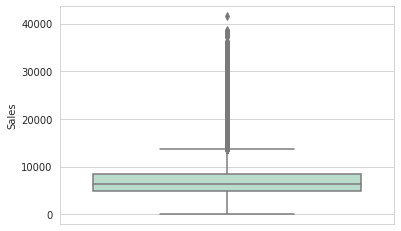

In [32]:
sns.set_style('whitegrid')
sns.boxplot(y=Rossmann_Stores_df['Sales'], palette='Pastel2');
plt.show()

Let's remove the Outlier present in our target variable.

In [33]:
percentile_25 = np.percentile(Rossmann_Stores_df['Sales'],25)
percentile_75 = np.percentile(Rossmann_Stores_df['Sales'],75)
iqr = (percentile_75 - percentile_25)
upper_outlier_bound = percentile_75 + 1.5*iqr
lower_outlier_bound = percentile_25 - 1.5*iqr

In [34]:
Rossmann_Stores_df.drop(index=Rossmann_Stores_df[Rossmann_Stores_df['Sales']>upper_outlier_bound].index,axis=0,inplace=True)
Rossmann_Stores_df.drop(index=Rossmann_Stores_df[Rossmann_Stores_df['Sales']<lower_outlier_bound].index,axis=0,inplace=True)


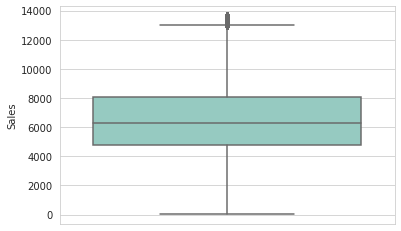

In [35]:
sns.set_style('whitegrid')
sns.boxplot(y=Rossmann_Stores_df['Sales'], palette='Set3');
plt.show()

#***3. Merging DataSets***

**-Creating a new Dataset with merging of two datasets to perform further operations Smoothly.**

In [36]:
#Merging of rossmann_Stores and Store_df
merged_df=pd.merge(left=Rossmann_Stores_df,right=Store_df ,how='left',on='Store')
merged_df.shape

(813569, 15)

**-We have seen in the previous data analysis that there are some categorical data for the columns such as State holiday,School holiday,Store type,Assortment,etc.**

**-Let's further analyse them.**

In [37]:
#To Review merged dataset before analysis it further
merged_df.sample(20)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
504421,133,1,2013-12-09,6023,781,1,0,0,0,a,a,270.0,8.0,2013.0,1
249580,116,4,2014-10-09,7092,708,1,1,0,0,a,a,680.0,4.0,2013.0,0
765049,194,5,2013-02-22,4299,395,1,1,0,0,d,c,16970.0,9.0,2013.0,1
634940,310,5,2013-07-19,10292,893,1,1,0,1,a,c,2290.0,9.0,2013.0,1
589153,37,5,2013-09-06,4686,606,1,0,0,0,c,a,4230.0,12.0,2014.0,0
771632,339,5,2013-02-15,3745,576,1,0,0,0,a,c,2280.0,9.0,2013.0,1
495783,233,4,2013-12-19,12808,1298,1,1,0,0,a,a,1890.0,9.0,2013.0,0
656862,670,3,2013-06-26,5428,634,1,0,0,0,a,a,2060.0,9.0,2013.0,1
378097,516,6,2014-05-03,5474,726,1,0,0,0,a,c,20.0,9.0,2013.0,1
813182,737,3,2013-01-02,5806,979,1,0,0,1,a,a,100.0,5.0,2007.0,1


In [38]:
#To check datatypes of dataset
merged_df.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
dtype: object

**-Here we can see that there are columns like Date,StateHoliday,SchoolHoliday,Storetype,Assortment which are of datatypes object but in machine learning, algorithm works quite well with numerical data.**

**-Let's perform some operation to make them work.**

In [39]:
#merged_df['StoreType'].value_counts()
merged_df['StoreType'].nunique()

4

# ***4. Features Transformation***

In [40]:
#Convert the a,b,c into 1 as they represent Holiday
merged_df["StateHoliday"] = merged_df['StateHoliday'].apply(lambda x: str(x).replace('a',"1") if 'a' in str(x) else x)
merged_df["StateHoliday"] = merged_df['StateHoliday'].apply(lambda x: str(x).replace('b',"1") if 'b' in str(x) else x)
merged_df["StateHoliday"] = merged_df['StateHoliday'].apply(lambda x: str(x).replace('c',"1") if 'c' in str(x) else x)

merged_df["StateHoliday"] = merged_df["StateHoliday"].astype(int)

In [41]:
merged_df['StateHoliday'].value_counts()

0    812812
1       757
Name: StateHoliday, dtype: int64

**-By doing the above Imputation and conversion we get a categorical values of 0 & 1 for StateHoliday.**

**-Converting datetime object into year,week and month format.**




In [42]:
#Converting date to datetime
merged_df['Date']=pd.to_datetime(merged_df['Date'])

In [43]:
#checking datatype of Date
merged_df['Date'].dtypes

dtype('<M8[ns]')

In [44]:
#To convert date in year,month and week
merged_df['year']=merged_df['Date'].dt.year
merged_df['month']=merged_df['Date'].dt.month
merged_df['week']=merged_df['Date'].dt.week


In [45]:
#Deleting the date column
del merged_df['Date']

**-We added 3 New Features into our Data set & removed 1 Feature Date.**

In [46]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'year', 'month', 'week'],
      dtype='object')

# ***5.Exploratory Data Analysis***

**-Let's perform simple tasks on our dataset and explore it more by usng different methods.**

###**CHART-1**

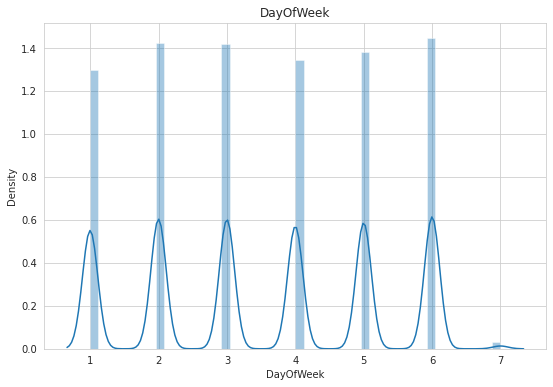

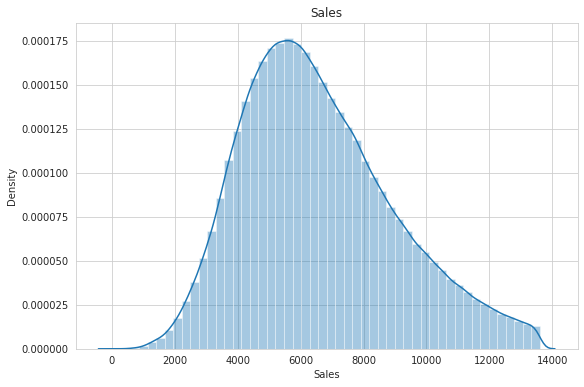

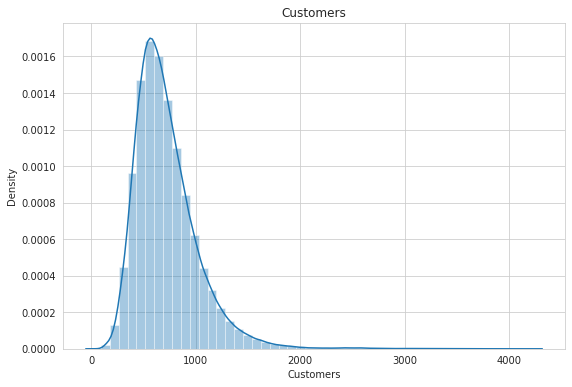

In [47]:
# visualization code
numeric_features = list(Rossmann_Stores_df.describe().columns)

# printing displots to analyze the distribution of all numerical features
# plot a bar plot for each numerical feature count (except store)

for col in numeric_features[1:-3]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = Rossmann_Stores_df[col]
    sns.distplot(feature,ax = ax)    
    ax.set_title(col)
plt.show()

**-printing displots to analyze the distribution of all numerical features**

**-Data is not in normal distribution**

###**CHART-2**

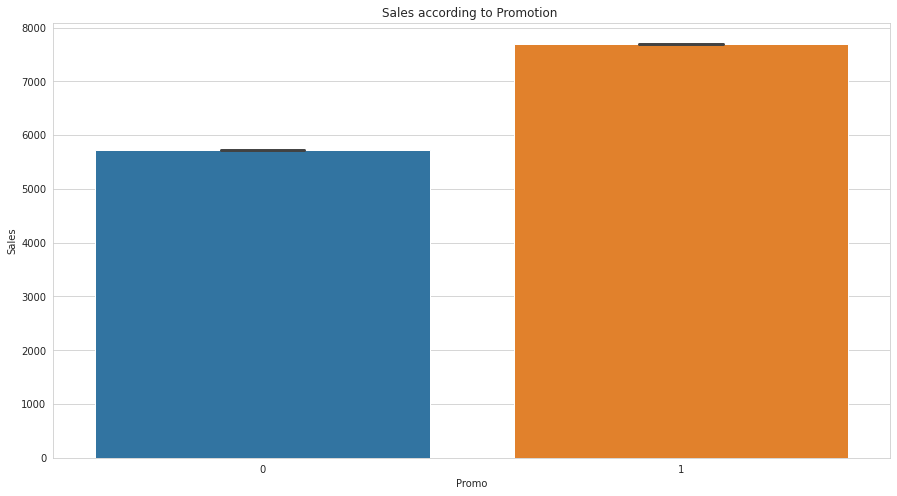

In [48]:
# visualization code
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=merged_df,x='Promo',y='Sales',ax=ax,capsize=.2,)
ax.set(title='Sales according to Promotion ')
plt.show()

**-As we can see that the store who participating in promotion having more sales as compare to other. which means promotion is the key to attract the customer towards the store.**

###**CHART-3**

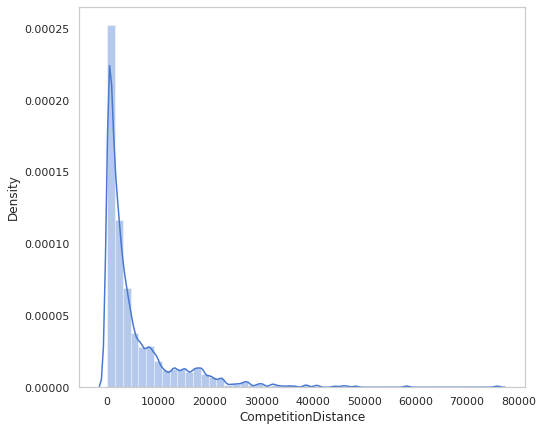

In [49]:
#Distribution of CompetitionDistance
sns.set_theme(rc={'figure.figsize': (8,7)},style='whitegrid',palette='muted')
ax = sns.distplot(merged_df['CompetitionDistance'])
ax.grid(False)


**-from above plot we are not able to conclude so apply log then trying to conclude something**

In [50]:
#applying log on CompetitionDistance Column
Store_df['CompetitionDistance'] = np.log(merged_df['CompetitionDistance'])

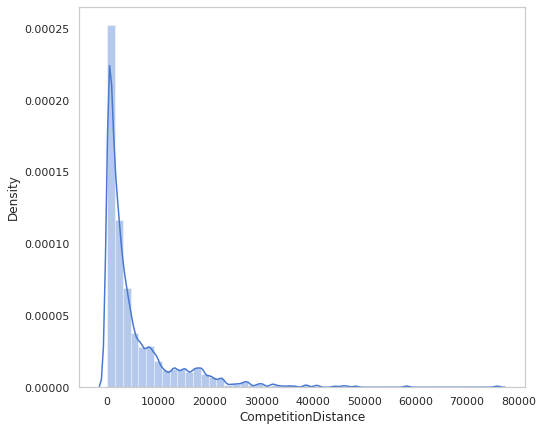

In [51]:
#Plotting CompetitionDistance against density
sns.set_theme(rc={'figure.figsize': (8,7)},style='whitegrid',palette='muted')
ax = sns.distplot(merged_df['CompetitionDistance'])
ax.grid(False)

**-In real world scenario it is possible to have these values as exceptionals.But for the ML algos and they may create problem.**

**-This feature seems to have an outlier for the model.**

**-Hence we remove only those values Removal of which does not affect the original data. And also which are at extreme point.**

**Conclusion:-**

**-We have turned our target variable into a normal Distribution which is one of the important Assumption for Regression model.**

**-Great! Our Target variable is ready to train and test.**

###**CHART-4**

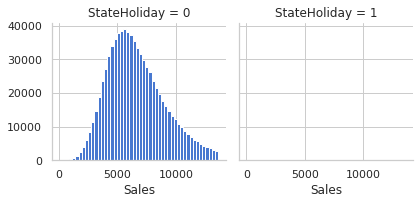

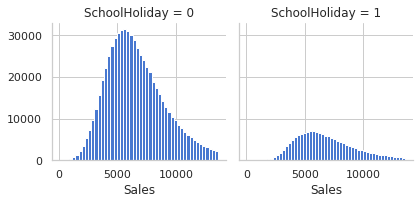

In [52]:
# effect of StateHoliday and SchoolHoliday over Sales
g = sns.FacetGrid(merged_df, col='StateHoliday')
g.map(plt.hist, 'Sales',bins=50)
plt.show()

g = sns.FacetGrid(merged_df, col='SchoolHoliday')
g.map(plt.hist, 'Sales',bins=50)
plt.show()


**-During StateHolidays there is negligible sales records.
But we have some Sales records even during SchoolHolidays.**

**-We can Eliminate StateHoliday feature from our traning model.**

###**CHART-5**

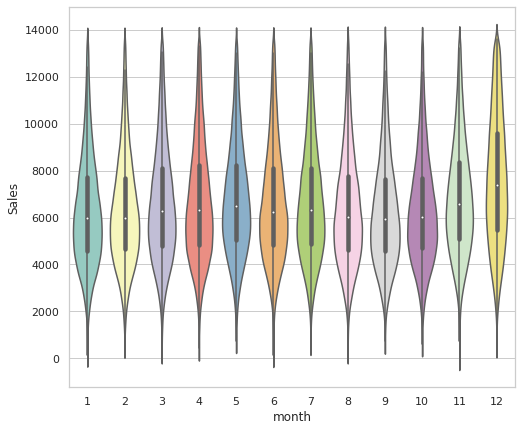

In [53]:
#violinplot of month and sales
sns.set_theme(style='whitegrid')
ax=sns.violinplot(x='month',y='Sales',data=merged_df, palette='Set3')

**-As we see above plot, we can conclude that sales are increasing with months. so that in November and December sales are too high as compare to starting of the year.**

###**CHART-6**

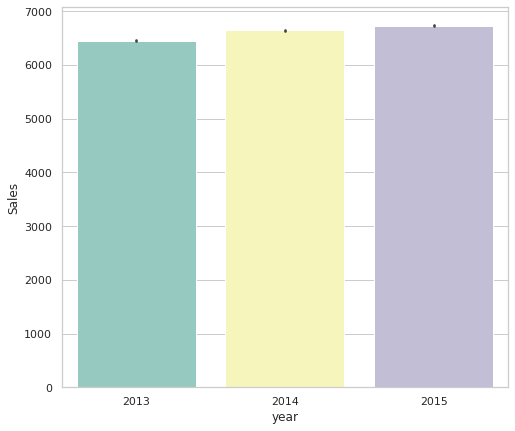

In [54]:
#barplot of year and sales
sns.set_theme(style='whitegrid')
ax=sns.barplot(x='year',y='Sales',data=merged_df, palette='Set3')

**-Hence sales are going high and high per every year**

###**CHART-7**

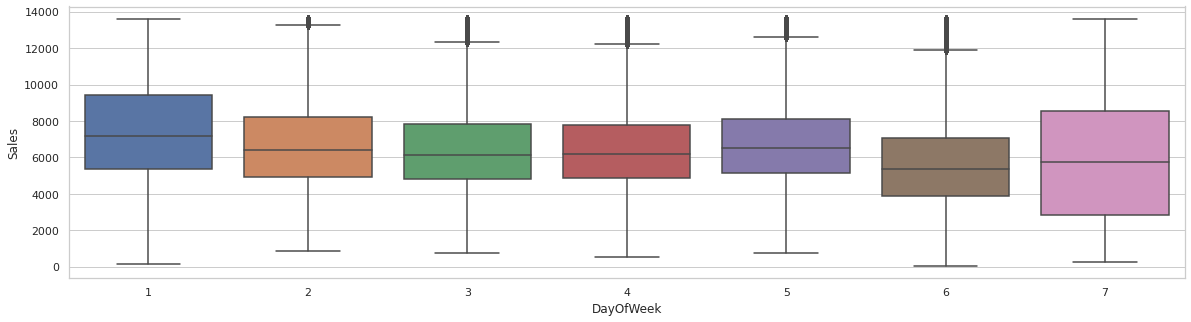

In [55]:
#DayOfWeek vs Sales 
sns.set_theme(style='whitegrid',rc={'figure.figsize':(20,5)})
ax=sns.boxplot(x='DayOfWeek',y='Sales',data=merged_df)

**-Sundays have negligible sales records.**

**-Monday(1) and Friday(5) have highest sales.**

**-Fridays have mavimum sales records.**

**-Sales has declined in year 2015 compare to previous years.**

**-we can drop the sundays as it may create unbalance in the feature DayOfWeek.** 

###**CHART-8**

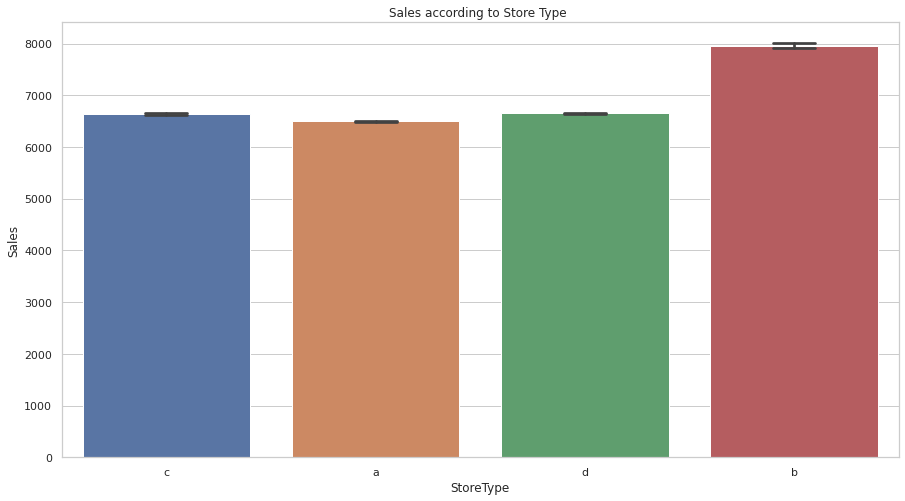

In [56]:
# visualization code
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=merged_df,x='StoreType',y='Sales',ax=ax,capsize=.2)
ax.set(title='Sales according to Store Type ')
plt.show()

**-This plot shows relation between StoreType and Sales.**

**-In the above chart The sales in the store type "b" have higher sales as compare to other store catagory. the rest of store having almost same sales.**

**-If you want more sales then go with "b" StoryType.**

###**CHART-9**

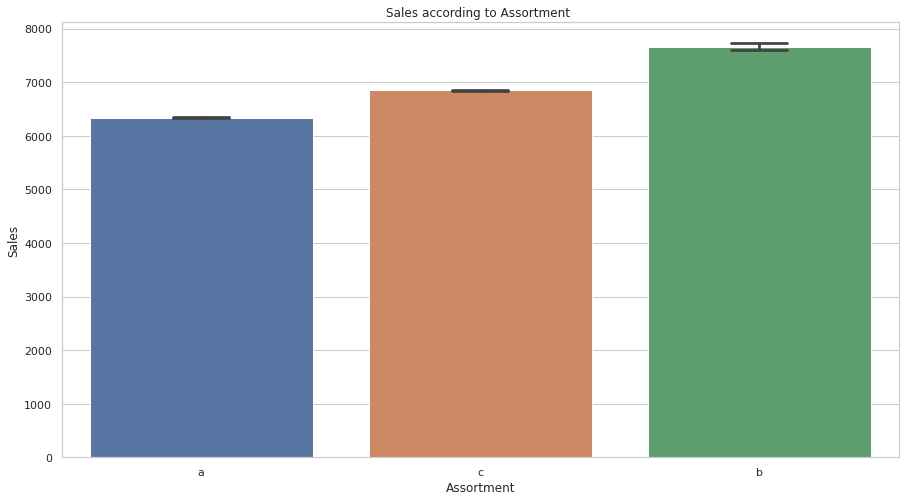

In [57]:
# visualization code
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=merged_df,x='Assortment',y='Sales',ax=ax,capsize=.2)
ax.set(title='Sales according to Assortment ')
plt.show()

**-In the above chart The sales in which product assortment type "b" have higher sales as compare to other assortment catagory. the rest of assortment having almost same sales.**

**-This plot shows People prefer Extra level of Assortment.**

###**CHART-10**

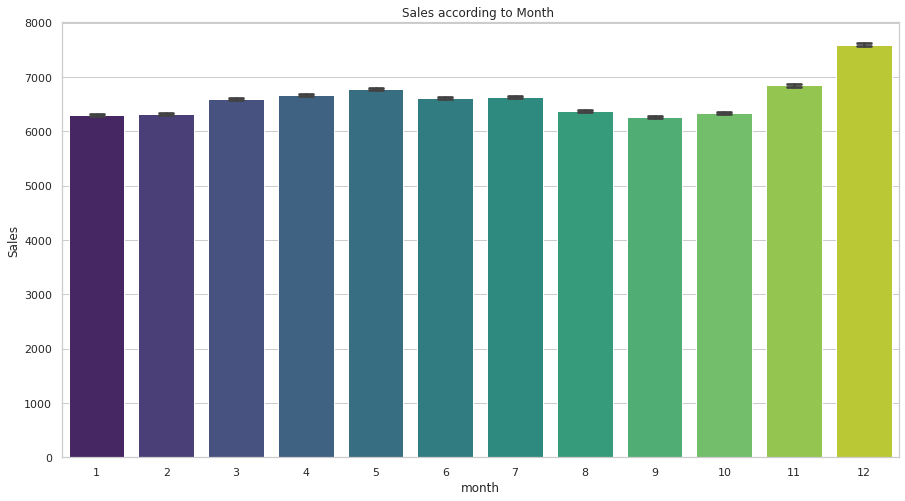

In [58]:
# Distributing sales with respect to month

fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=merged_df,x='month',y='Sales',ax=ax,capsize=.2, palette= "viridis"  )
ax.set(title='Sales according to Month ')
plt.show()

**-As we see sales are increasing with months.**

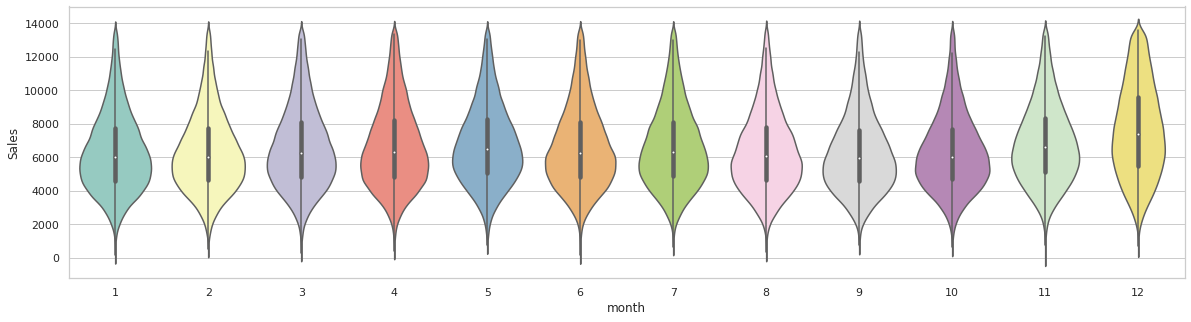

In [59]:
#violinplot of month and sales
sns.set_theme(style='whitegrid')
ax=sns.violinplot(x='month',y='Sales',data=merged_df, palette='Set3' )

**-According to the plot we can see that the sell is increases in the December and Decrases in January.**

**-This plot concludes that sales are more in last 6 months as compare to first 6 months.**

**-By seeing this plot we can conclude that stores need more supply in between July to December stores should offer some discount in january to June to attract more customers.**

###**CHART-11**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b935f1370>,
      dtype=object)

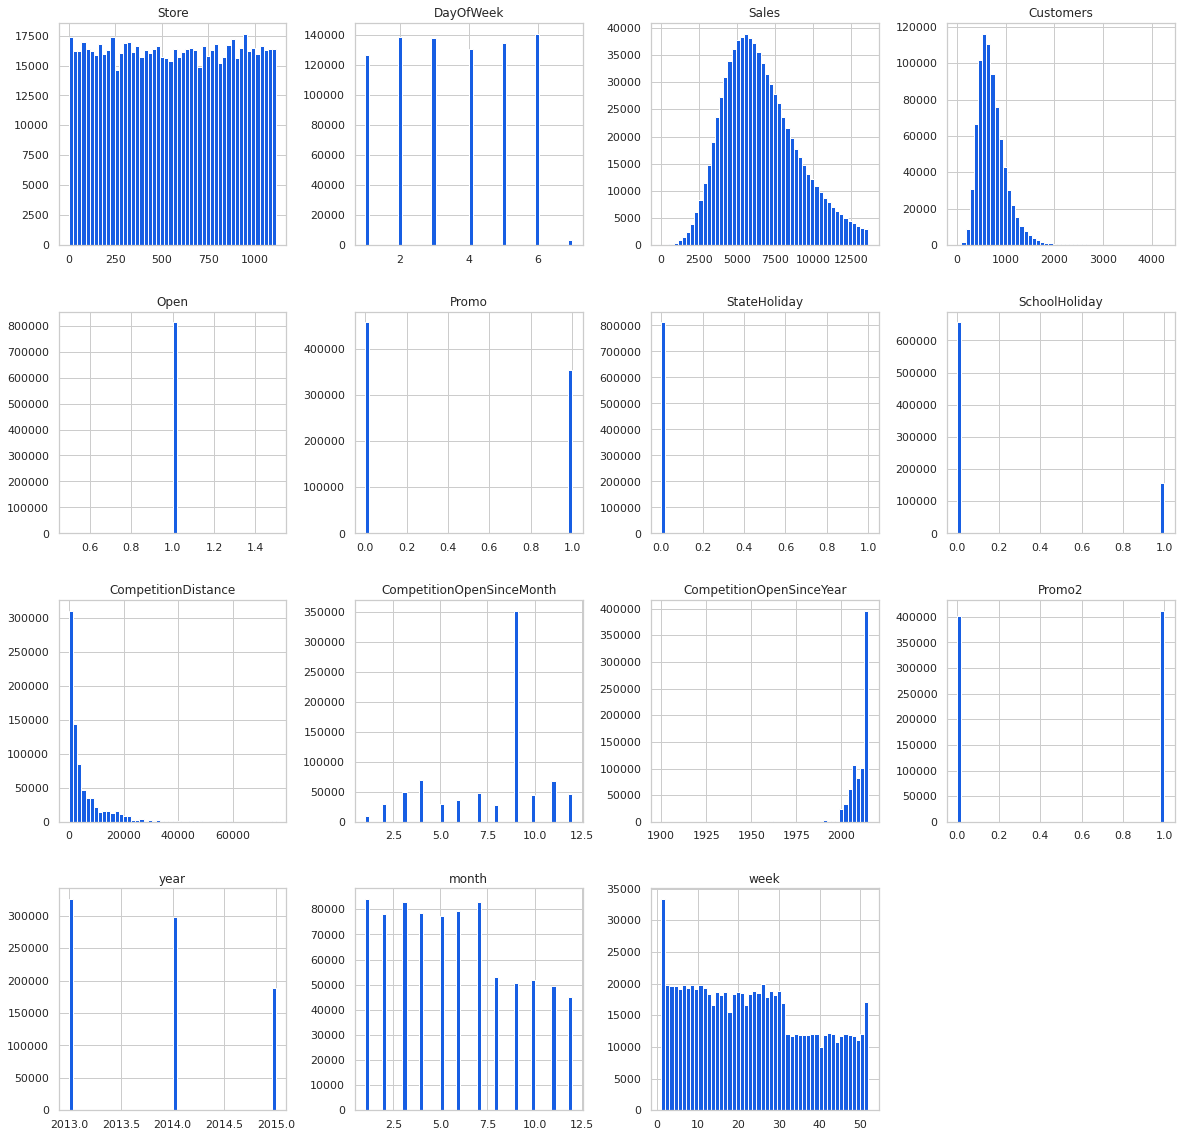

In [60]:
# Feature Selection for our Regression Model.
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

merged_df.hist(figsize = (20,20),bins=50,color='#175ee3')

###**Assumptions in Regression**

**-Regression is a parametric approach. ‘Parametric’ means it makes assumptions about data for the purpose of analysis. Due to its parametric side, regression is restrictive in nature.**

  **1.There should be a linear and additive relationship between dependent (response) variable and independent (predictor) variable(s).**

  **2.There should be no correlation between the residual (error) terms. Absence of this phenomenon is known as Autocorrelation.**

  **3.The independent variables should not be correlated. Absence of this phenomenon is known as multicollinearity.**

  **4.The error terms must have constant variance. This phenomenon is known as homoskedasticity. The presence of non-constant variance is referred to heteroskedasticity.**

  **5.The error terms must be normally distributed.**

###**CHART-12**

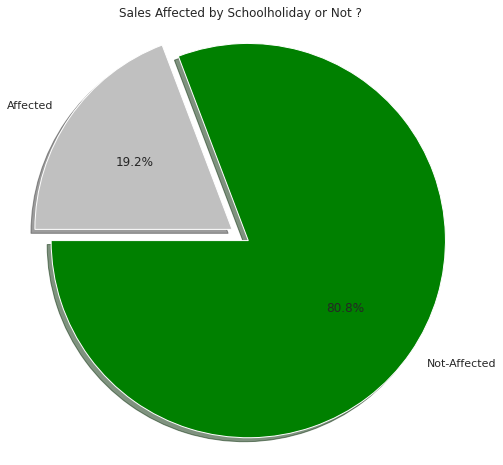

In [61]:
# Sales Over SchoolHoliday
labels = 'Not-Affected' , 'Affected'
sizes = merged_df.SchoolHoliday.value_counts()
colors = ['green', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

**-Around 20% of sales are affected by school holidays**

###**CHART-13**

**-Linearity**

**-Linear regression needs the relationship between the independent and dependent variables to be linear. Let's use a pair plot to check the relation of independent variables with the Sales variable.**

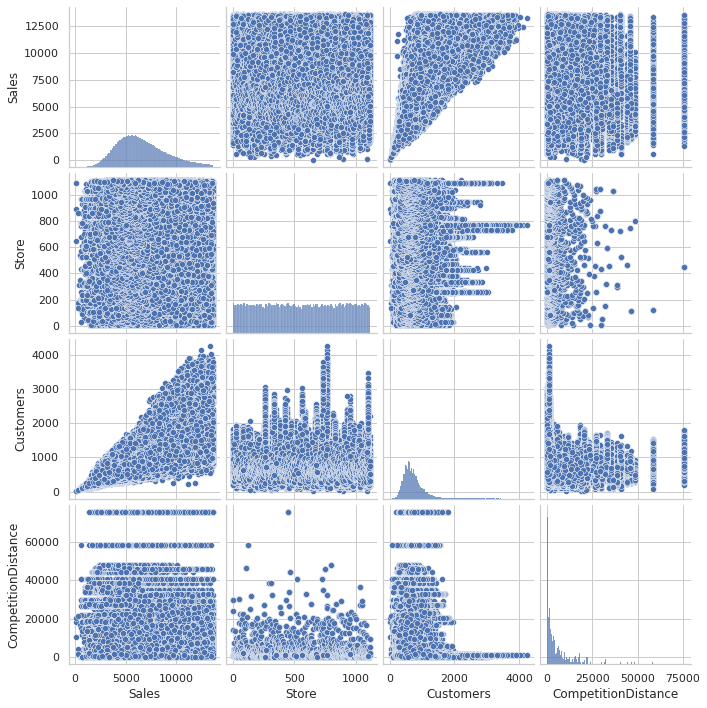

In [62]:
# Pair plot to check the relation of independent variables with the Sales variable
Plot=merged_df[['Sales','Store', 'Customers','CompetitionDistance']]
sns.pairplot(Plot)
plt.show()

###**CHART-14**

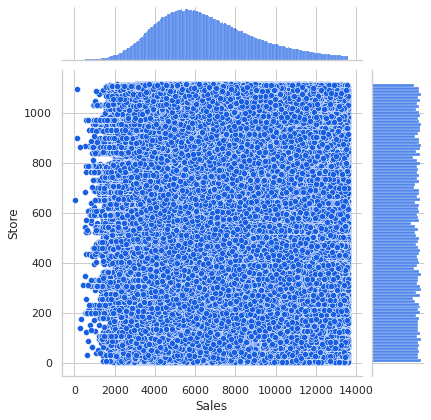

In [63]:
#join plot for store vs sales
sns.jointplot(x='Sales',y ='Store', data = merged_df,color='#175ee3')
plt.show()

###**CHART-15**

**Sales Vs Customers**

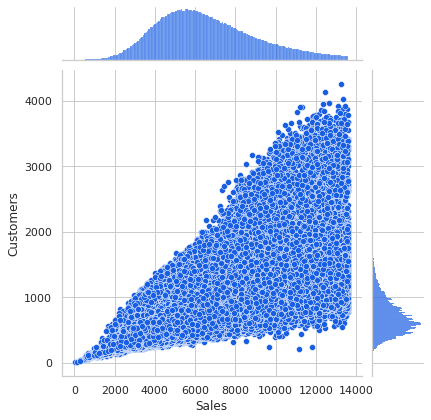

In [64]:
#join plot for Sales Vs Customers
sns.jointplot(x='Sales',y ='Customers', data =merged_df,color='#175ee3')
plt.show()

###**CHART-16**

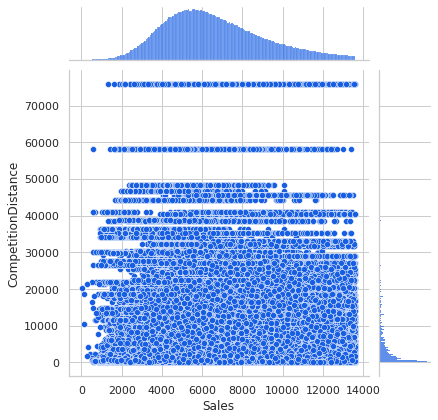

In [65]:
#joinplot for sales vs CompetitionDistance
sns.jointplot(x='Sales',y ='CompetitionDistance', data =merged_df,color='#175ee3')
plt.show()


**-By looking at the plots we can see that with the Sales variable none of the independent variables form an accurately lineear shape.**

**-So it shows that a linear regression fitting might not be the best model for it.** 

**-A linear model might not be able to efficiently explain the data in terms of variability, prediction accuracy etc.**

**-Correlation and perfect multicollinearity**

  **-Correlation is a statistical term describing the degree to which two variables move in coordination with one another. If the two variables move in the same direction, then those variables are said to have a positive correlation. If they move in opposite directions, then they have a negative correlation.**

  **-In regression, multicollinearity refers to the extent to which independent variables are correlated. Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity.**



###**CHART-17**

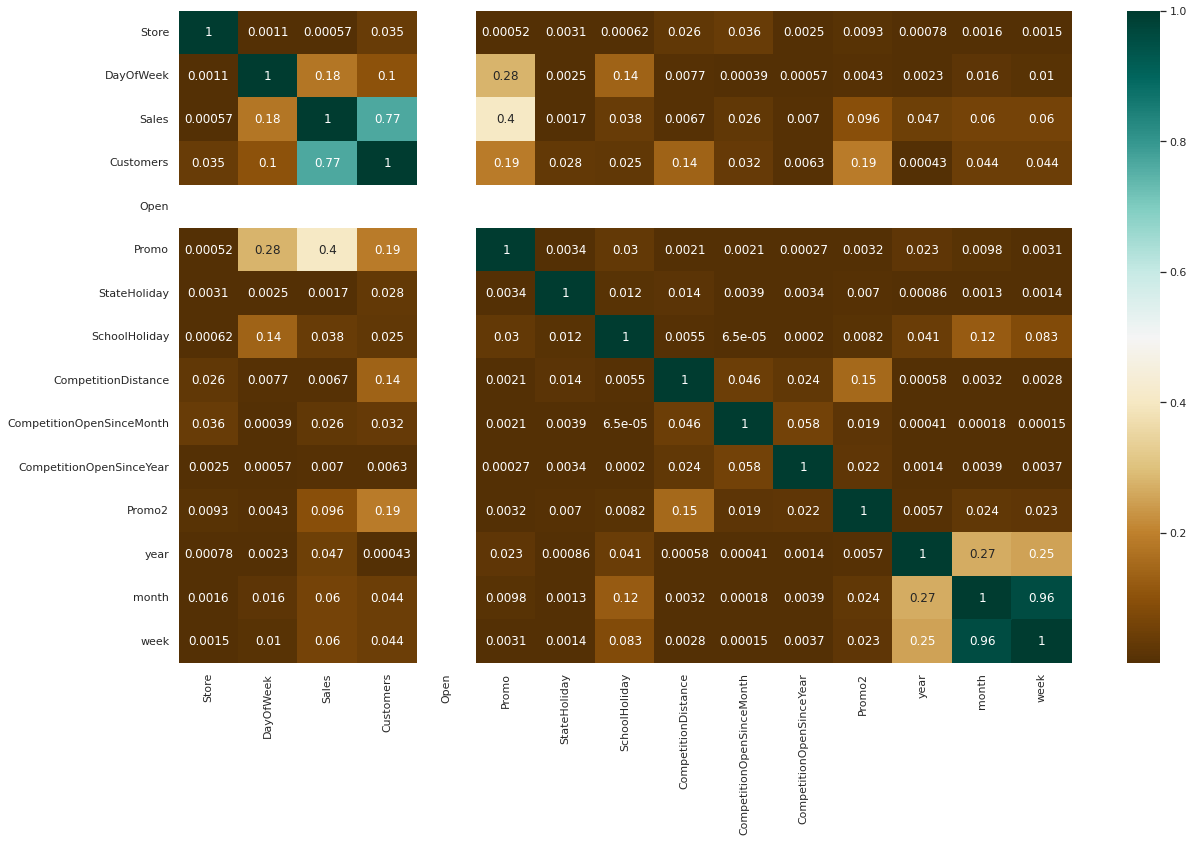

In [66]:
# Heat Map


plt.figure(figsize=(20,12))
correlation = merged_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='BrBG')
plt.show()

**-Look for correlation of rows where the dependent variable (Sales in this case) is not involved because if a variable is correlated with the dependent variable then this would be a good sign for our model.**


## **One Hot Encoding**

In [67]:
merged_df['Assortment'].nunique()

3

In [68]:
merged_df['StateHoliday'].nunique()

2

**-Performing one hot encoding for the StoreType and Assortment.**

In [69]:
merged_df=pd.get_dummies(merged_df,columns=['StoreType','Assortment'])
#k-1 hot encoding
 #pd.get_dummies(df,columns=['Storetype','Assortment','StateHoliday'],drop_first=True)
 

In [70]:
merged_df

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,year,month,week,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5,5263,555,1,1,0,1,1270.0,9.0,...,2015,7,31,0,0,1,0,1,0,0
1,2,5,6064,625,1,1,0,1,570.0,11.0,...,2015,7,31,1,0,0,0,1,0,0
2,3,5,8314,821,1,1,0,1,14130.0,12.0,...,2015,7,31,1,0,0,0,1,0,0
3,5,5,4822,559,1,1,0,1,29910.0,4.0,...,2015,7,31,1,0,0,0,1,0,0
4,6,5,5651,589,1,1,0,1,310.0,12.0,...,2015,7,31,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813564,682,2,3375,566,1,0,1,1,150.0,9.0,...,2013,1,1,0,1,0,0,1,0,0
813565,733,2,10765,2377,1,0,1,1,860.0,10.0,...,2013,1,1,0,1,0,0,0,1,0
813566,769,2,5035,1248,1,0,1,1,840.0,9.0,...,2013,1,1,0,1,0,0,0,1,0
813567,948,2,4491,1039,1,0,1,1,1430.0,9.0,...,2013,1,1,0,1,0,0,0,1,0


In [71]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'year', 'month', 'week', 'StoreType_a', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_a', 'Assortment_b', 'Assortment_c'],
      dtype='object')

### **Independent Variable Selection**

In [72]:
# listing out independent variable
select_df=merged_df[['DayOfWeek', 'Sales', 'Customers', 'Promo','SchoolHoliday','CompetitionDistance','CompetitionOpenSinceYear', 'Promo2',  'year', 'month','week',
                     'StoreType_a', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_a', 'Assortment_b', 'Assortment_c'
]]

In [73]:
#Corr map
correlation = select_df.corr()
correlation

,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceYear,Promo2,year,month,week,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
DayOfWeek,1.000000,-0.177498,-0.102114,-0.277742,-0.138130,0.007742,0.000566,-0.004333,0.002264,-0.016006,-0.010403,0.000576,0.034742,-0.005938,-0.005271,-0.005793,0.023119,0.001463
Sales,-0.177498,1.000000,0.765781,0.403230,0.038404,-0.006662,0.006991,-0.096125,0.047357,0.059862,0.060425,-0.040066,0.069082,0.008714,0.018740,-0.109955,0.041929,0.102229
Customers,-0.102114,0.765781,1.000000,0.190119,0.025192,-0.139653,0.006279,-0.189330,0.000434,0.043784,0.043988,0.099396,0.383165,0.086647,-0.270260,-0.017120,0.358709,-0.050161
Promo,-0.277742,0.403230,0.190119,1.000000,0.029672,-0.002072,0.000273,0.003244,0.023371,-0.009826,0.003082,-0.003099,-0.021978,0.004453,0.005764,0.005413,-0.012165,-0.003138
SchoolHoliday,-0.138130,0.038404,0.025192,0.029672,1.000000,-0.005487,0.000201,-0.008165,-0.040604,0.122317,0.082612,0.001603,-0.001991,0.002631,-0.003144,0.004254,-0.001499,-0.003978
CompetitionDistance,0.007742,-0.006662,-0.139653,-0.002072,-0.005487,1.000000,0.023906,-0.151584,0.000583,0.003205,0.002827,-0.031324,-0.068538,-0.099208,0.124557,-0.147100,-0.051449,0.156943
CompetitionOpenSinceYear,0.000566,0.006991,0.006279,0.000273,0.000201,0.023906,1.000000,-0.021601,0.001435,0.003856,0.003732,-0.036311,0.008552,-0.024784,0.055090,-0.090772,0.008733,0.089251
Promo2,-0.004333,-0.096125,-0.189330,0.003244,-0.008165,-0.151584,-0.021601,1.000000,-0.005693,-0.024394,-0.023413,-0.072836,-0.041750,0.001654,0.087979,-0.014053,-0.004360,0.014889
year,0.002264,0.047357,0.000434,0.023371,-0.040604,0.000583,0.001435,-0.005693,1.000000,-0.267264,-0.252831,0.000906,0.000459,0.002581,-0.002995,-0.001035,-0.001960,0.001404
month,-0.016006,0.059862,0.043784,-0.009826,0.122317,0.003205,0.003856,-0.024394,-0.267264,1.000000,0.960513,0.004223,0.004351,0.005224,-0.009521,-0.006766,0.001445,0.006503


In [74]:
final_df=select_df[['DayOfWeek', 'Sales', 'Customers','SchoolHoliday', 'CompetitionDistance',
                     'CompetitionOpenSinceYear', 'Promo2', 'year', 'month', 'week']]

# ***6.Building Regression Model***

**-Linear Regression is the simplest algorithm in machine learning, it can be trained in different ways. In this notebook we will cover the following linear algorithms:**

#**1.Linear Regression Model**

In [75]:
from sklearn import metrics
#Evaluate Metrics
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    

In [76]:
select_df.columns

Index(['DayOfWeek', 'Sales', 'Customers', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceYear', 'Promo2', 'year',
       'month', 'week', 'StoreType_a', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_a', 'Assortment_b', 'Assortment_c'],
      dtype='object')

In [77]:
#Fitting the linear model
x=select_df.drop(['Sales'],axis=1)
y=merged_df['Sales']

## **Train Test Split**

**-Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.**

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [79]:
#For Linear regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)


LinearRegression(normalize=True)

In [80]:
coeff_df = pd.DataFrame(lin_reg.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
DayOfWeek,-1.998332e+01
Customers,7.200657e+00
Promo,1.074796e+03
SchoolHoliday,3.213718e+01
CompetitionDistance,2.374900e-02
CompetitionOpenSinceYear,-6.202420e+00
Promo2,3.135677e+02
year,1.652024e+02
month,4.284916e+01
week,-3.436627e+00


In [81]:
pred = lin_reg.predict(X_test)

In [82]:
#Evaluation Metrics
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)




Test set evaluation:
_____________________________________
MAE: 866.3355662901369
MSE: 1286832.8297503595
RMSE: 1134.386543357404
R2 Square 0.7797366392672244
__________________________________
Train set evaluation:
_____________________________________
MAE: 866.1042040533944
MSE: 1282944.181742517
RMSE: 1132.6712593433795
R2 Square 0.7814197983999067
__________________________________


##**Mean of Residuals**

**-Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero. So let's find out.**

In [83]:
#Finding mean of Residuals
residuals = y_train.values-train_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -0.6885362196179794


**-Very close to zero so all good here.**

##**Check for Normality of error terms/residuals**

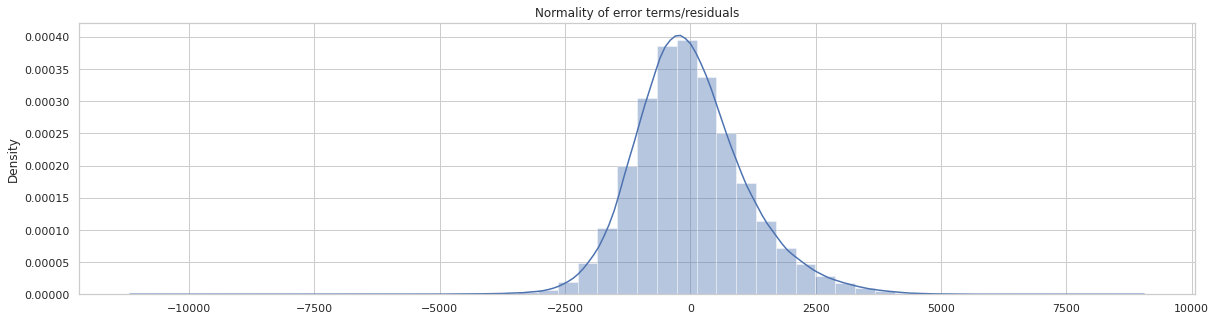

In [84]:
#Distplot for Normality of error terms/residuals
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

**-The residual terms are pretty much normally distributed for the number of test points we took. Remember the central limit theorem which says that as the sample size increases the distribution tends to be normal. A skew is also visible from the plot. It's very difficult to get perfect curves, distributions in real life data.**

**-Over Data is as such that our Linear model is not able to performe well in it.**

**-Apply cross validation and check different accuracy.**


##**CROSS VALIDATION**
**-As you know in KNN method we use train test split with random_state that split exactly same at each time. However, if we do not use random_state, data is split differently at each time and according to split accuracy will be different. Therefore, we can conclude that model performance is dependent on train_test_split. For example you split, fit and predict data 5 times and accuracies are 0.89, 0.9, 0.91, 0.92 and 0.93, respectively. Which accuracy do you use? Do you know what accuracy will be at 6th times split, train and predict. The answer is I do not know but if I use cross validation I can find acceptable accuracy.**

**-K folds = K fold CV.***

**-When K is increase, computationally cost is increase**

**-cross_val_score(LR_model,x,y,cv=5): use reg(linear regression) with x and y that we define at above and K is 5. It means 5 times(split, train,predict)**

In [85]:
# CV
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
k = 5



cv_result = cross_val_score(lin_reg,x,y,cv=k) # uses R^2 as score 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [0.76587404 0.77903719 0.78320099 0.77826135 0.78480279]
CV scores average:  0.778235270080461


##**Regularized Regression with Hyper parameter Tunning.**

**-As we learn linear regression choose parameters (coefficients) while minimizing lost function. If linear regression thinks that one of the feature is important, it gives high coefficient to this feature. However, this can cause overfitting that is like memorizing in KNN. In order to avoid overfitting, we use regularization that penalize large coefficients.**

**-Ridge regression:First regularization technique. Also it is called L2 regularization.**

**-Ridge regression lost fuction = OLS + alpha * sum(parameter^2) alpha is parameter we need to choose to fit and predict. alpha is hyperparameter that we need to choose for best accuracy and model complexity.**

**-This process is called hyperparameter tuning.**

**-What if alpha is zero? lost function = OLS so that is linear rigression**

**-If alpha is small that can cause overfitting**

**-If alpha is big that can cause underfitting.**

**-Lasso regression:Second regularization technique. Also it is called L1 regularization.**

**-Lasso regression lost fuction = OLS + alpha * sum(absolute_value(parameter))**

**-It can be used to select important features od the data. Because features whose values are not shrinked to zero, is chosen by lasso regression.**




# **2. Lasso Regression**

**-Now we are going to use regularized linear regression models from the scikit learn module. I'm going to try both l_1(Lasso) and l_2(Ridge) regularization. I'll also define a function that returns the cross-validation rmse error so we can evaluate our models and pick the best tuning parameter**

In [87]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score




lasso = Lasso(selection='random',random_state=0)
parameters = {'alpha': [1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

test_pred = lasso_regressor.predict(X_test)
train_pred = lasso_regressor.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
zw=print_evaluate(y_train, train_pred)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)

Test set evaluation:
_____________________________________
MAE: 866.2747873820608
MSE: 1286827.3908534914
RMSE: 1134.3841460693513
R2 Square 0.779737570227078
__________________________________
Train set evaluation:
_____________________________________
MAE: 866.0423311342057
MSE: 1282923.743304013
RMSE: 1132.6622370786504
R2 Square 0.7814232805763508
__________________________________
The best fit alpha value is found out to be : {'alpha': 0.01}


#**3. Ridge Regression**

In [88]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.001, solver='cholesky', tol=0.0001, random_state=42)
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)

test_pred = ridge.predict(X_test)
train_pred = ridge.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)




Test set evaluation:
_____________________________________
MAE: 866.2762536979751
MSE: 1286826.129990428
RMSE: 1134.3835903213815
R2 Square 0.7797377860452708
__________________________________
Train set evaluation:
_____________________________________
MAE: 866.0437789966707
MSE: 1282923.7275186605
RMSE: 1132.6622301103982
R2 Square 0.7814232832657628
__________________________________


#**4. Elastic Net**

In [89]:
from sklearn.linear_model import ElasticNet

Elastic = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
Elastic.fit(X_train, y_train)

test_pred = Elastic.predict(X_test)
train_pred = Elastic.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)



Test set evaluation:

MAE: 874.1013151939036
MSE: 1331170.6124098648
RMSE: 1153.7636726859903
R2 Square 0.7721474724459858
__________________________________
Train set evaluation:

MAE: 873.3263353452055
MSE: 1323788.5505951717
RMSE: 1150.5601029912223
R2 Square 0.7744609840531158
__________________________________


#**5. Decision Tree Regressor**

In [90]:
from sklearn.tree import DecisionTreeRegressor

DT_model = DecisionTreeRegressor()
DT_model.fit(X_train,y_train)


DecisionTreeRegressor()

In [91]:
test_pred = DT_model.predict(X_test)
train_pred = DT_model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)




Test set evaluation:
_____________________________________
MAE: 445.29092763990803
MSE: 406271.3500436348
RMSE: 637.3941873312266
R2 Square 0.9304597373790868
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.016779690183284224
MSE: 9.44757663767037
RMSE: 3.073691044602624
R2 Square 0.9999983903795383
__________________________________


**Observation:-**
The decision tree regressor performing well compared to Linear

#**6. Random Forest Regressor**

In [93]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [50]}
rfr = RandomForestRegressor(random_state = 1)

random_forest_model= GridSearchCV(estimator = rfr, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

# # Fit the object to train dataset
random_forest_model.fit(X_train, y_train)



GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [50]},
             return_train_score=True)

In [94]:
test_pred = random_forest_model.predict(X_test)
train_pred = random_forest_model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)



Test set evaluation:
_____________________________________
MAE: 326.8861598455641
MSE: 210858.04420527205
RMSE: 459.192818111599
R2 Square 0.9639080536488929
__________________________________
Train set evaluation:
_____________________________________
MAE: 123.0344190333709
MSE: 30599.93139039788
RMSE: 174.92836073775425
R2 Square 0.994786570399986
__________________________________


**Observation:**
Random Forest regressor had the lowest error as compared to other models, which means it is better at predicting sales than other models.

## **7. Gradient Boosting Regression**

**Gradient boosting** is a machine learning technique used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees. When a decision tree is the weak learner, the resulting algorithm is called gradient-boosted trees; it usually outperforms random forest. A gradient-boosted trees model is built in a stage-wise fashion as in other boosting methods, but it generalizes the other methods by allowing optimization of an arbitrary differentiable loss function.

In [95]:
# Model Training
from sklearn.ensemble import GradientBoostingRegressor

gbc_reg = GradientBoostingRegressor(random_state =42)
gbc_reg.fit(X_train,y_train)

GradientBoostingRegressor(random_state=42)

In [96]:
# Model Prediction
y_pred_gb =gbc_reg.predict(X_test)
r2_score(y_pred_gb,y_test)


0.8121733032246357

In [97]:
test_pred = gbc_reg.predict(X_test)
train_pred = gbc_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 717.177923728561
MSE: 871463.1338852672
RMSE: 933.5218979141663
R2 Square 0.8508342387709182
__________________________________
Train set evaluation:
_____________________________________
MAE: 716.025290114354
MSE: 869403.969136022
RMSE: 932.4183444870773
R2 Square 0.8518762565433168
__________________________________


## **8. XGboost Regression**

**XGBoost** is a powerful approach for building supervised regression models.The objective function contains loss function and a regularization term.
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks. However, when it comes to small-to-medium structured/tabular data, decision tree based algorithms are considered best-in-class right now. Please see the chart below for the evolution of tree-based algorithms over the years.

In [98]:
import xgboost as xgb

In [99]:
# Model Training

from xgboost import XGBRegressor

xgb_reg=XGBRegressor(max_depth=5,n_estimators=100,learning_rate=0.3,n_jobs=-1)   
xgb_reg.fit(X_train,y_train)

[15:40:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.3, max_depth=5, n_jobs=-1)

In [100]:
# Model Prediction
y_pred_xgb =xgb_reg.predict(X_test)
r2_score(y_pred_xgb,y_test)


0.924750563856713

In [101]:
test_pred = xgb_reg.predict(X_test)
train_pred = xgb_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 471.7540495597134
MSE: 393631.5969445707
RMSE: 627.4006669940435
R2 Square 0.9326232464472946
__________________________________
Train set evaluation:
_____________________________________
MAE: 469.0232668817036
MSE: 389030.1073249305
RMSE: 623.7227808288956
R2 Square 0.9337194240422103
__________________________________


**-After looking at the various regression techniques we came to the conclusion that XGboost have better model performance**

 **(`R2 : 0.9337194`).**

## **Understanding the important features**

In [102]:
# features used
columns = list(X_train.columns)
columns

['DayOfWeek',
 'Customers',
 'Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'CompetitionOpenSinceYear',
 'Promo2',
 'year',
 'month',
 'week',
 'StoreType_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c']

In [103]:
# getting weights of all the features used in the data
feature_importance = random_forest_model.best_estimator_.feature_importances_
# Lets make a dataframe consists of features and values
feature_importance_df = pd.DataFrame({'Features':columns, 'Values':feature_importance})
feature_importance_df.sort_values(by=["Values"], inplace=True, ascending=False)
feature_importance_df

,Features,Values
1,Customers,0.692610
4,CompetitionDistance,0.097726
13,StoreType_d,0.058036
2,Promo,0.046571
5,CompetitionOpenSinceYear,0.030980
0,DayOfWeek,0.014707
6,Promo2,0.010758
15,Assortment_b,0.010136
9,week,0.010049
7,year,0.005184


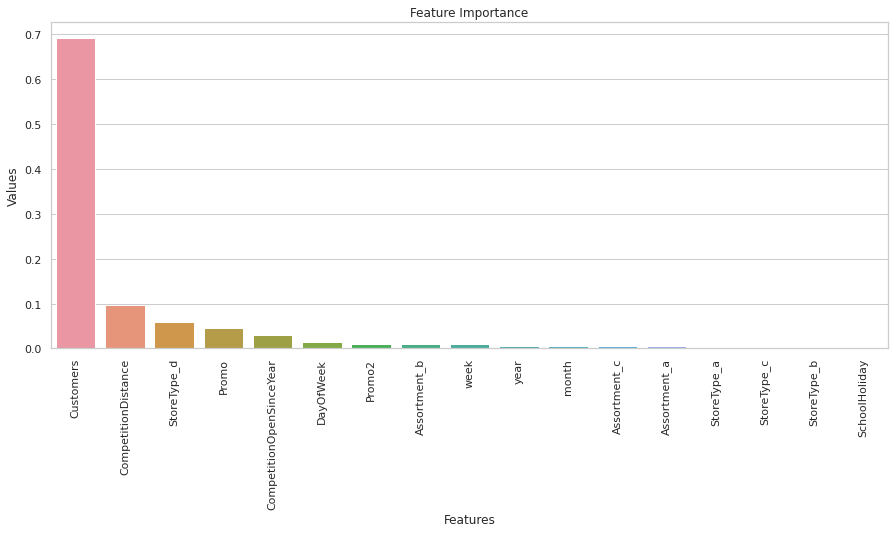

In [104]:
# Feature Importance
plt.figure(figsize=(15,6))

sns.barplot(x=feature_importance_df['Features'], y=feature_importance_df['Values'],
            data = feature_importance_df ).set(title='Feature Importance')

plt.xticks(rotation=90)
plt.show()

**-Finally we proved that Customers variable is more important feature for Sales.**

**-Then CompetitionDistance and store type are more important veriables.**


In [105]:
LR=round(lin_reg.score(X_train,y_train)*100,2)

Rg=round(ridge.score(X_train,y_train)*100,2)
Elas=round(Elastic.score(X_train,y_train)*100,2)
Dt=round(DT_model.score(X_train,y_train)*100,2)
Rf=round(random_forest_model.score(X_train,y_train)*100,2)
gbr=round(gbc_reg.score(X_train,y_train)*100,2)
xgbr=round(xgb_reg.score(X_train,y_train)*100,2)

In [106]:
from sklearn import metrics
ls2=round(metrics.r2_score(y_train,lasso_regressor.predict(X_train))*100,2)
ls2

78.14

In [107]:
models =pd.DataFrame({
    'Model': ['Linear_Regression', 'Lasso_Regression','Ridge_Regression',
              'Elastic_Net', 'Desicion-Tree_Regression', 'Random_Forest', 'Gradient_Boosting', 'XGBoost_Regression'],
    'Score': [LR,ls2,Rg,Elas,Dt,Rf,gbr,xgbr]})
#models.sort_values(by='Score')
#models
models.sort_values(by='Score',ascending=False)
#df=pd.DataFrame(models)

,Model,Score
4,Desicion-Tree_Regression,100.00
5,Random_Forest,99.48
7,XGBoost_Regression,93.37
6,Gradient_Boosting,85.19
0,Linear_Regression,78.14
1,Lasso_Regression,78.14
2,Ridge_Regression,78.14
3,Elastic_Net,77.45


#***7. Challenges Faced***

**-Handling and understanding large amount of data.(1017209 number of records and 18 number of fields )**

**-Columns with improper data type and wrong values.**

**-Combining, creating and removing columns.**

**-Records containing more than 50% of nan values and replacing it with substitutes.**

**-Removing and replacing outliers from dependent and independent variables.
Reducing skewness from the variables.**

**-Feature selections for ML Model.**

**-Converting columns with categorical variables to integer type and scaling numerical variables for regression models.**

**-Performing and choosing right kind of model.**

# ***8. Key findings from machine learning***

---



**1. Out of all seven Linear Regression Models that we built, it was found that linear regression was the fastest model while Random Forest regression was the slowest followed by Gradient Boosting Algorithm and XGBoost Regression among all the tested algorithms.**

**2. It was found that even though Random Forest Regression model was one of the slowest, it had the higher Adjusted R2 score of 0.9948 among the other models and Best Parameters for Random Forest Regression according.**

**3. Our random forest model gave the highest importance to the number of customers as it showed correlation of 0.91 with dependent variable Sales in our correlation graph.**



#***9. Conclusion***

**-Store model 'b' have least number of stores in Rossmann yet it performed well and made more sales than other store models so it is advisable to increase the number of 'b' store model.**

**-Assortment level ‘Extra (1)' have the maximum number of stores in Rossmann yet it performed very badly but at the same time ‘Basic' and 'Extended' assortment level with less number of store had preformed extra ordinarily so it would be advisable to increase these assortment level.**

**-we can conclude that stores need more supply in between July to December.**

**-stores should offer some discount in january to June to attract more customers.**

**-Sales has been low on the initial days of the month as compared to the end days, it can be assumed that people used to shop for the next month at the end of the previous month. Those products can be mainly be of basic necessities of a person's daily life.**

**-Average sales on weekdays was more as compared to weekends because promo's were provided to the customers during weekdays to increase the sales and not to weekends and reason might be that store use to remain close on Sundays.**

**-Sales during November and December month was  higher compared to other months and that can be due to festive season in western European countries.**

**-School holidays also influenced the sales a lot as it can be observed that 17.8% of the sales gets affected by the school holidays which also means that around 17% of the sales are oriented from the school students.**

**-Performing various regression techniques, we can observe that XGboost Regression model have the better performance (with R2 : 0.9337) and we finally came to the conclusion that 'Random Forest Regression' model have even higher performance (with R2 :0.9948) among the other models, as Random Forest Regression can handle large datasets efficiently and it's algorithm provides a higher level of accuracy in predicting outcomes over any other regression algorithm**